# 鸢尾花数据集分析

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

# 加载 Iris 数据集
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


K-Means 聚类效果：
FM 指数: 0.7693
Rand 指数: 0.8455
inertia_: 94.4854
轮廓系数: 0.4263


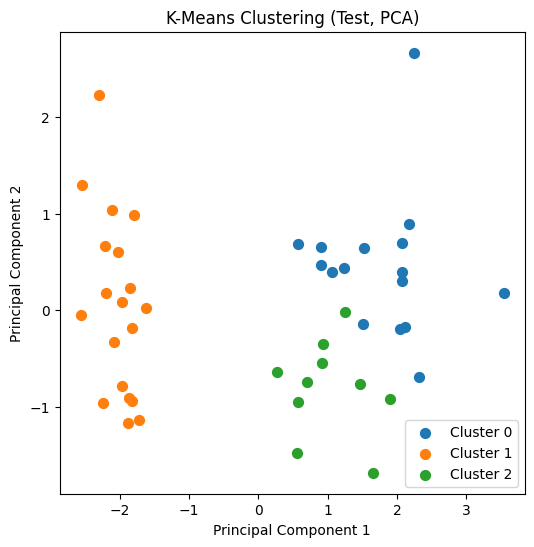

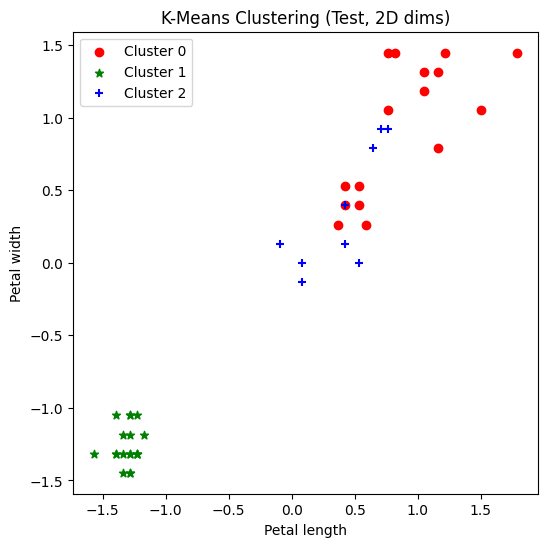

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import fowlkes_mallows_score, rand_score, silhouette_score

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# FM，Rand，inertia_，轮廓系数
fm_score_kmeans = fowlkes_mallows_score(y_test, kmeans_labels)
rand_score_kmeans = rand_score(y_test, kmeans_labels)
inertia_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(X_test, kmeans_labels)

print("K-Means 聚类效果：")
print(f"FM 指数: {fm_score_kmeans:.4f}")
print(f"Rand 指数: {rand_score_kmeans:.4f}")
print(f"inertia_: {inertia_kmeans:.4f}")
print(f"轮廓系数: {silhouette_kmeans:.4f}")

# 降维可视化
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.figure(figsize=(6, 6))
for label in np.unique(kmeans_labels):
    idx = kmeans_labels == label
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label=f'Cluster {label}', s=50)
plt.title('K-Means Clustering (Test, PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 二维，Petal length和Petal width
xp0 = X_test[kmeans_labels == 0]
xp1 = X_test[kmeans_labels == 1]
xp2 = X_test[kmeans_labels == 2]
plt.figure(figsize=(6, 6))
plt.scatter(xp0[:, 2], xp0[:, 3], c='red', marker='o', label='Cluster 0')  # 第2维和第3维
plt.scatter(xp1[:, 2], xp1[:, 3], c='green', marker='*', label='Cluster 1')
plt.scatter(xp2[:, 2], xp2[:, 3], c='blue', marker='+', label='Cluster 2')
plt.legend(loc=2)  # 图例显示在左上角
plt.title('K-Means Clustering (Test, 2D dims)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


DBSCAN 聚类效果：
FM 指数: 0.7094
Rand 指数: 0.8232
轮廓系数: 0.5052


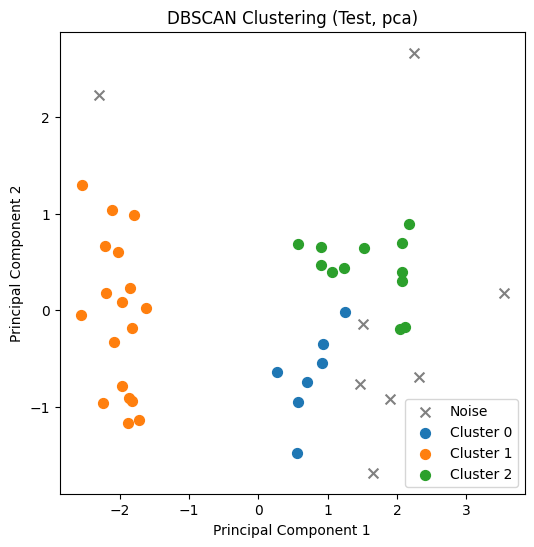

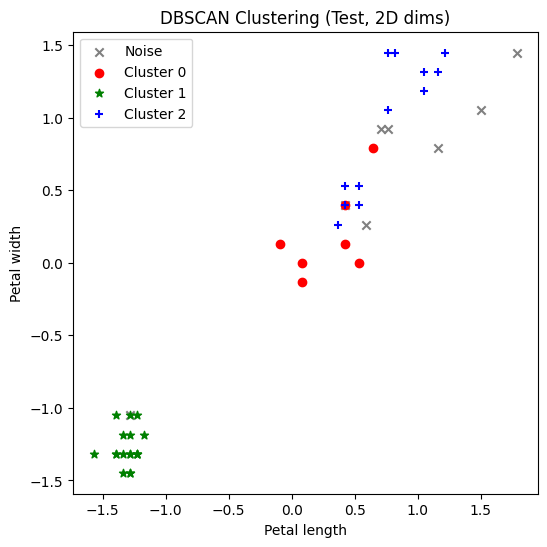

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_test)

# 计算 FM,Rand,轮廓系数
fm_score_dbscan = fowlkes_mallows_score(y_test, dbscan_labels)
rand_score_dbscan = rand_score(y_test, dbscan_labels)
non_noise_idx = dbscan_labels != -1
if non_noise_idx.any():
    silhouette_dbscan = silhouette_score(X_test[non_noise_idx], dbscan_labels[non_noise_idx])
else:
    silhouette_dbscan = -1  # 如果全是噪声点

print("DBSCAN 聚类效果：")
print(f"FM 指数: {fm_score_dbscan:.4f}")
print(f"Rand 指数: {rand_score_dbscan:.4f}")
print(f"轮廓系数: {silhouette_dbscan:.4f}")

# 降维可视化
plt.figure(figsize=(6, 6))
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    idx = dbscan_labels == label
    if label == -1:
        plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label='Noise', color='gray', s=50, marker='x')
    else:
        plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label=f'Cluster {label}', s=50)
plt.title('DBSCAN Clustering (Test, pca)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 二维可视化，Petal length和Petal width
xp_noise = X_test[dbscan_labels == -1]  # 噪声点
xp0 = X_test[dbscan_labels == 0]  # Cluster 0
xp1 = X_test[dbscan_labels == 1]  # Cluster 1
xp2 = X_test[dbscan_labels == 2]  # Cluster 2
plt.figure(figsize=(6, 6))
if len(xp_noise) > 0:
    plt.scatter(xp_noise[:, 2], xp_noise[:, 3], c='gray', marker='x', label='Noise')  # 噪声点
if len(xp0) > 0:
    plt.scatter(xp0[:, 2], xp0[:, 3], c='red', marker='o', label='Cluster 0')
if len(xp1) > 0:
    plt.scatter(xp1[:, 2], xp1[:, 3], c='green', marker='*', label='Cluster 1')
if len(xp2) > 0:
    plt.scatter(xp2[:, 2], xp2[:, 3], c='blue', marker='+', label='Cluster 2')
plt.legend(loc=2)
plt.title('DBSCAN Clustering (Test, 2D dims)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

决策树分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



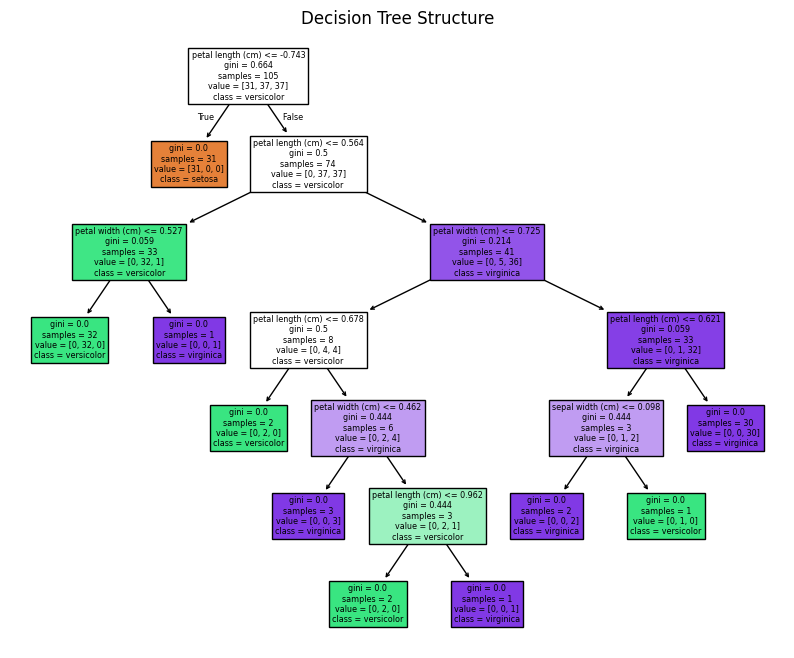

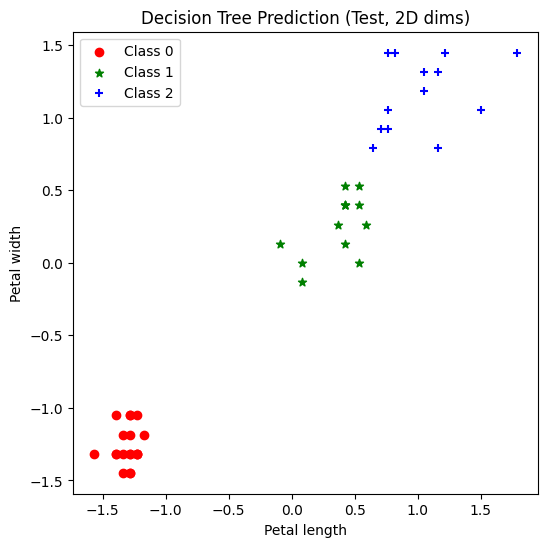

特征重要性: [0.         0.01911002 0.89326355 0.08762643]


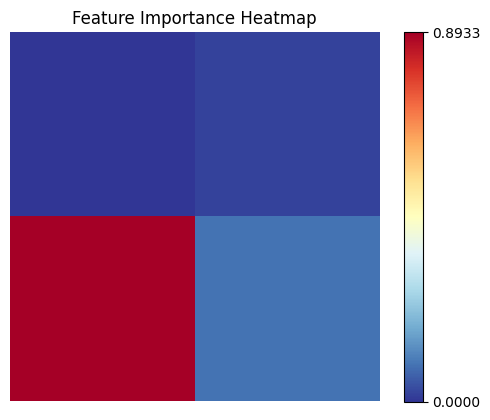

In [36]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import plot_tree


# 决策树训练
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# # 降维可视化
# plt.figure(figsize=(6, 6))
# unique_labels = np.unique(y_pred_dt)
# 
# # 绘制散点图并标注类别
# for label in unique_labels:
#     idx = y_pred_dt == label
#     plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label=f'Class {label}', s=50)
# 
# plt.title('Decision Tree Prediction (Test, PCA)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()  # 添加图例
# plt.show()

# 分类报告
print("决策树分类报告:")
print(classification_report(y_test, y_pred_dt))

# 决策树可视化
plt.figure(figsize=(10, 8))
plot_tree(dt_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Structure')
plt.show()

# 散点图
xp0 = X_test[y_pred_dt == 0]  # 类别 0
xp1 = X_test[y_pred_dt == 1]  # 类别 1
xp2 = X_test[y_pred_dt == 2]  # 类别 2
plt.figure(figsize=(6, 6))
plt.scatter(xp0[:, 2], xp0[:, 3], c='red', marker='o', label='Class 0')
plt.scatter(xp1[:, 2], xp1[:, 3], c='green', marker='*', label='Class 1')
plt.scatter(xp2[:, 2], xp2[:, 3], c='blue', marker='+', label='Class 2')
plt.legend(loc=2)
plt.title('Decision Tree Prediction (Test, 2D dims)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# 4个特征重要性可视化
feature_importances = dt_clf.feature_importances_
print("特征重要性:", feature_importances)
image = feature_importances.reshape(2, 2)
plt.imshow(image, cmap='RdYlBu_r', interpolation='nearest')
plt.axis('off')  # 不显示坐标轴
char = plt.colorbar(ticks=[feature_importances.min(), feature_importances.max()])
plt.title("Feature Importance Heatmap")
plt.show()

逻辑回归参数: [[-0.98038903  1.0514275  -1.74778303 -1.60432635]
 [ 0.48807594 -0.36335348 -0.29971165 -0.67617406]
 [ 0.49231309 -0.68807402  2.04749468  2.28050042]]
逻辑回归截距: [-0.30477672  1.82356633 -1.51878961]
逻辑回归分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



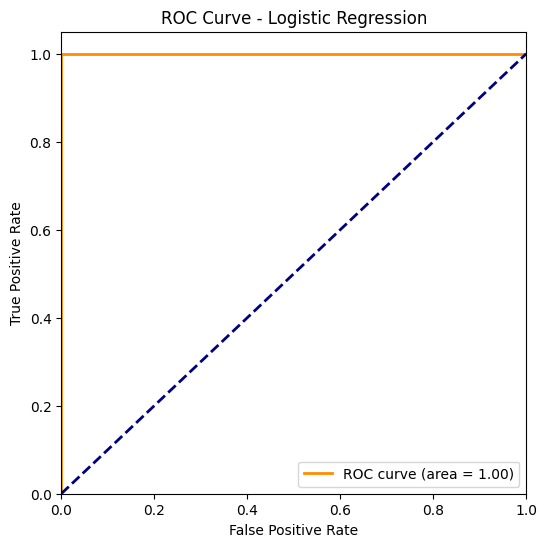

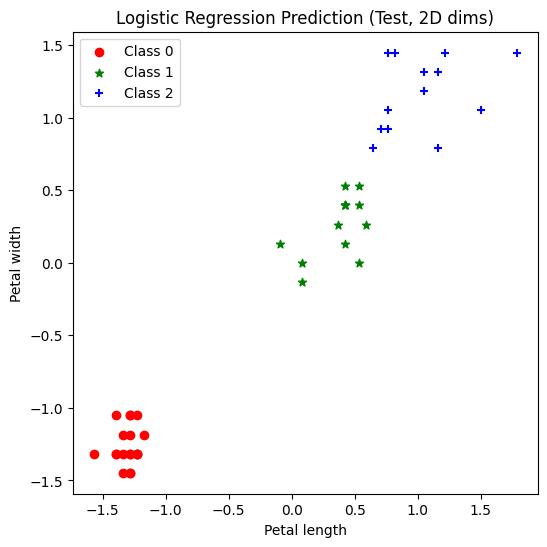

E:\Py-Project\DataScience\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


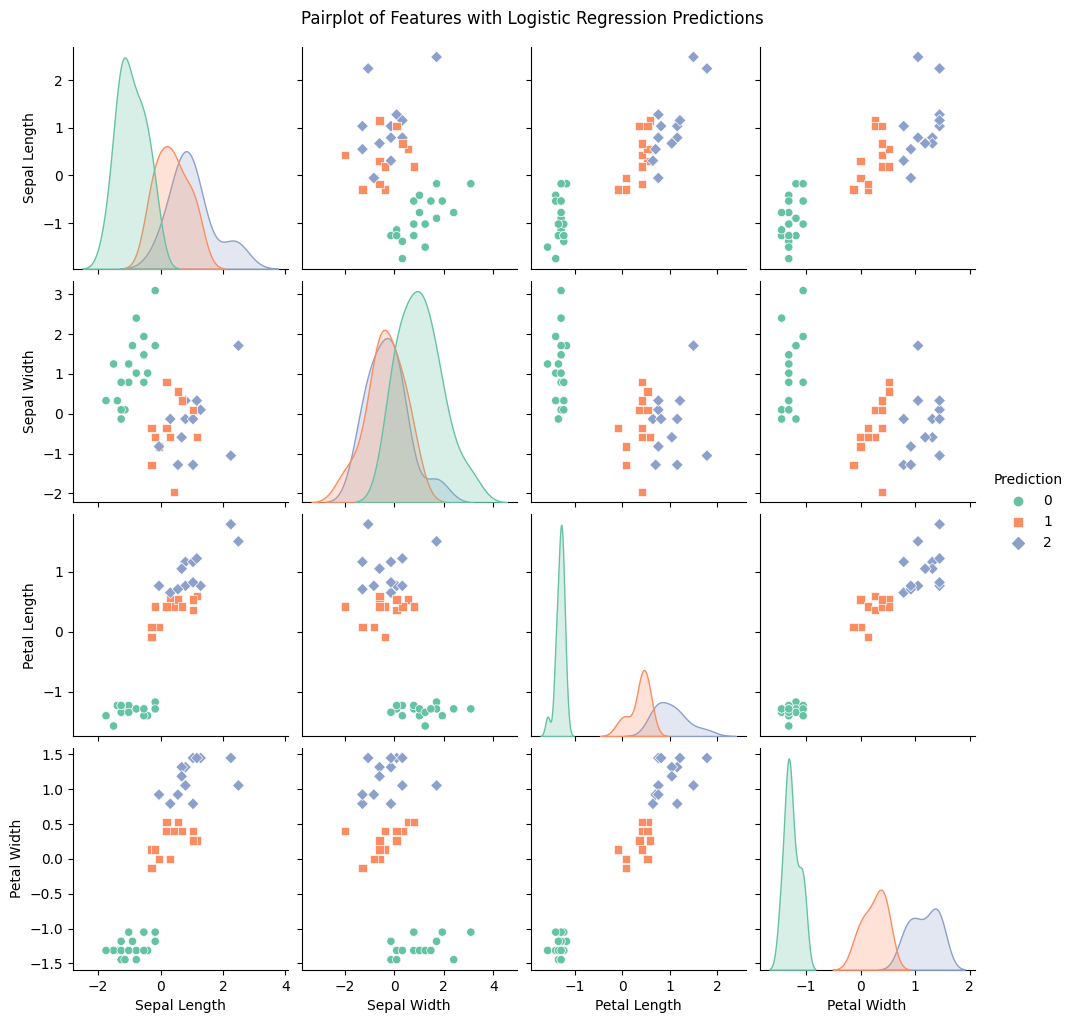

In [33]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 逻辑回归训练
lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
print(f"逻辑回归参数: {lr_clf.coef_}")
print(f"逻辑回归截距: {lr_clf.intercept_}")

# 分类报告
print("逻辑回归分类报告:")
print(classification_report(y_test, y_pred_lr))

# ROC 曲线
y_pred_prob_lr = lr_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test == 1, y_pred_prob_lr)  # 仅评估类别 1
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# 2D 可视化
xp0 = X_test[y_pred_lr == 0]
xp1 = X_test[y_pred_lr == 1]
xp2 = X_test[y_pred_lr == 2]
plt.figure(figsize=(6, 6))
plt.scatter(xp0[:, 2], xp0[:, 3], c='red', marker='o', label='Class 0')  # 第2维和第3维
plt.scatter(xp1[:, 2], xp1[:, 3], c='green', marker='*', label='Class 1')
plt.scatter(xp2[:, 2], xp2[:, 3], c='blue', marker='+', label='Class 2')
plt.legend(loc=2)
plt.title('Logistic Regression Prediction (Test, 2D dims)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# 使用成对特征散点图展示所有特征的组合
X_test_with_pred = pd.DataFrame(X_test, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
X_test_with_pred['Prediction'] = y_pred_lr
# 使用成对特征散点图展示所有特征的组合
sns.pairplot(X_test_with_pred, hue="Prediction", markers=["o", "s", "D"], palette="Set2")
plt.suptitle('Pairplot of Features with Logistic Regression Predictions', y=1.02)
plt.show()

